# Oil Mixing
This notebook contains a simple exercise of Mathematic Programming taken from the course "INTRODUCCIÓN A LA PROGRAMACIÓN MATEMÁTICA" from the UNED.
## Statement
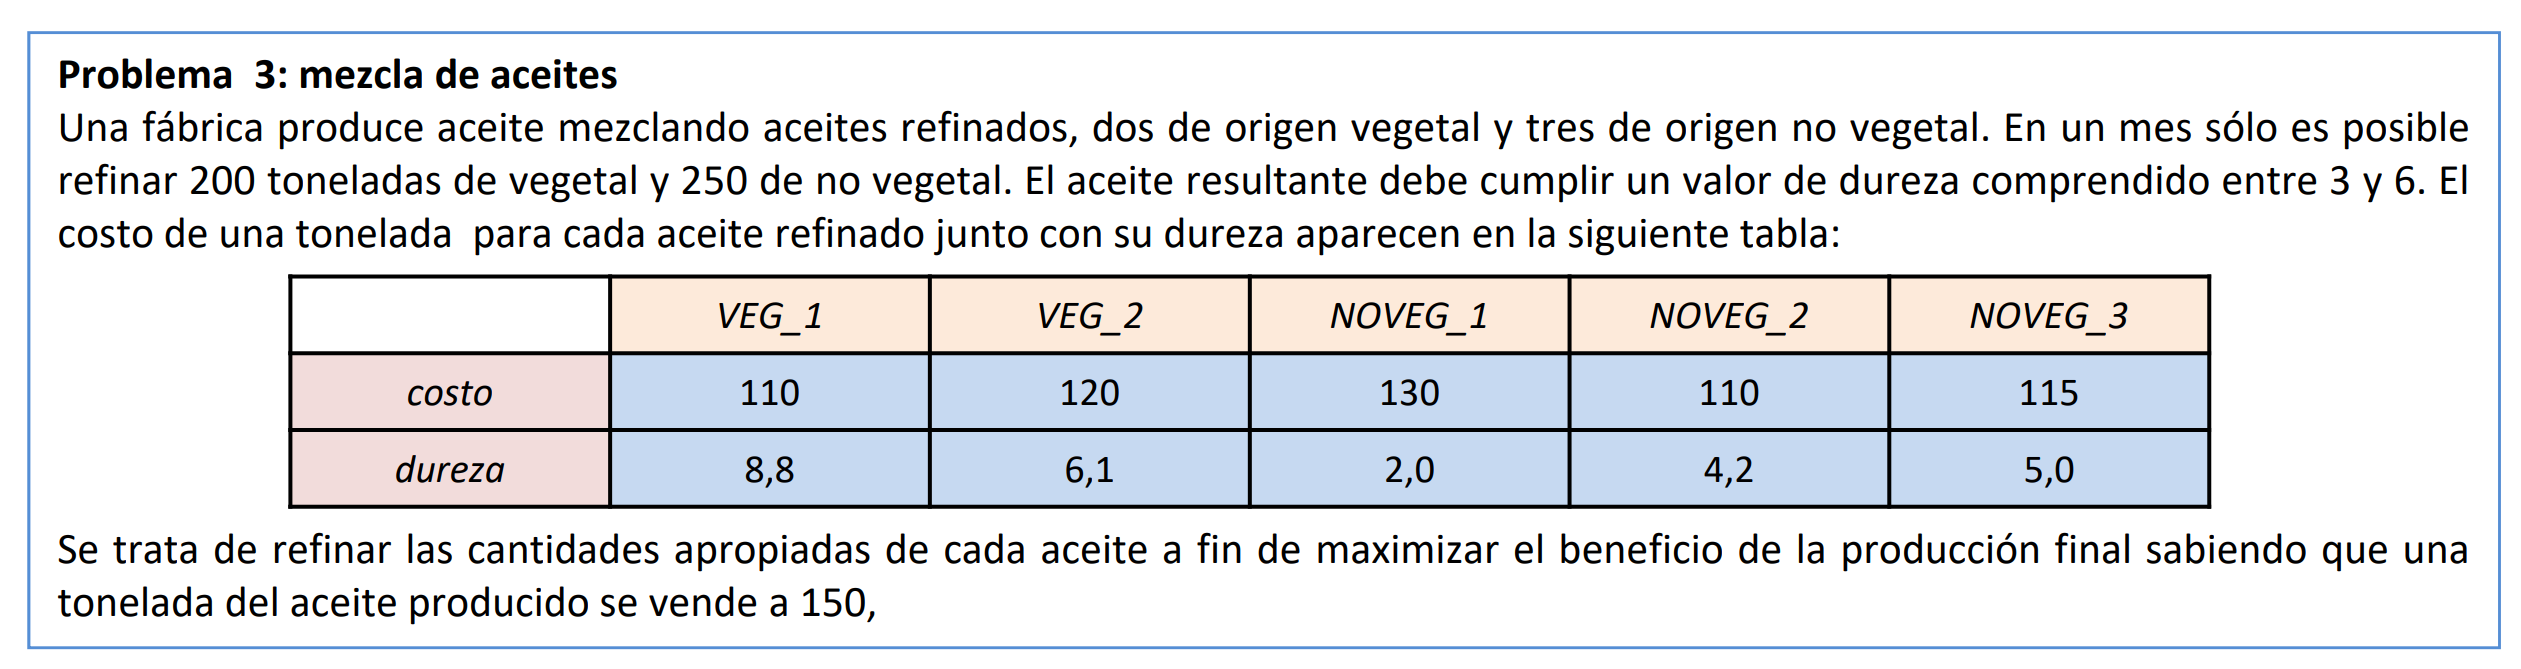

# Step 1: Define decision variables
The decision variables are:
- $ q_{veg1}$, quantity of VEG_1 oil used to mix
- $q_{veg2}$, quantity of VEG_2 oil used to mix
- $q_{noVeg1}$, quantity of NOVEG_1 oil used to mix 
- $q_{noVeg2}$, quantity of NOVEG_2 oil used to mix 
- $q_{noVeg3}$, quantity of NOVEG_3 oil used to mix 
- $q_{prod}$, quantity of oil produced

In [1]:
from mip import *

m = Model(sense=MAXIMIZE, solver_name=CBC)
m.threads = -1 # Use all cores Available

quantity_veg1   = m.add_var(name='Quantity of VEG_1', var_type=CONTINUOUS, lb=0)
quantity_veg2   = m.add_var(name='Quantity of VEG_2', var_type=CONTINUOUS, lb=0 )
quantity_noVeg1 = m.add_var(name='Quantity of NOVEG_1', var_type=CONTINUOUS, lb=0)
quantity_noVeg2 = m.add_var(name='Quantity of NOVEG_2', var_type=CONTINUOUS, lb=0)
quantity_noVeg3 = m.add_var(name='Quantity of NOVEG_3', var_type=CONTINUOUS, lb=0)
quantity_oil    = m.add_var(name='Total quantity of oil to produce', var_type=CONTINUOUS, lb=0) 

# Step 2: Define the restrictions
The restrictions are given by the limited amount of resources that are available:
- $q_{veg1} + q_{veg2} \le 200$
- $q_{noVeg1} + q_{noVeg2} + q_{noVeg3} \le 250$
- $q_{veg1} + q_{veg2} + q_{noVeg1} + q_{noVeg2} + q_{noVeg3} = q_{prod}$
- $q_{veg1}*c_{veg1} + q_{veg2}*c_{veg2} + q_{noVeg1}*c_{noVeg1} + q_{noVeg2}*c_{noVeg2} + q_{noVeg3}**c_{noVeg3} \ge 3*q_{prod}$
- $q_{veg1}*c_{veg1} + q_{veg2}*c_{veg2} + q_{noVeg1}*c_{noVeg1} + q_{noVeg2}*c_{noVeg2} + q_{noVeg3}**c_{noVeg3} \le 6*q_{prod}$

In [2]:
refinable_vegOil_tons = 200
refinable_noVegOil_tons = 250
min_oil_strength = 3
max_oil_strength = 6

strengths = [8.8, 6.1, 2, 4.2, 5]


refinable_vegOil_tons_constraint    = quantity_veg1 + quantity_veg2 <= refinable_vegOil_tons
refinable_noVegOil_tons_constraint  = quantity_noVeg1 + quantity_noVeg2 + quantity_noVeg3 <= refinable_noVegOil_tons
min_oil_strength_constraint         = quantity_veg1 * strengths[0] + quantity_veg2 * strengths[1] + quantity_noVeg1 * strengths[2] + quantity_noVeg2 * strengths[3] + quantity_noVeg3 * strengths[4] >= min_oil_strength * quantity_oil
max_oil_strength_constraint         = quantity_veg1 * strengths[0] + quantity_veg2 * strengths[1] + quantity_noVeg1 * strengths[2] + quantity_noVeg2 * strengths[3] + quantity_noVeg3 * strengths[4] <= max_oil_strength * quantity_oil
check_sum_constraint                = quantity_veg1 + quantity_veg2 + quantity_noVeg1 + quantity_noVeg2 + quantity_noVeg3 == quantity_oil

m.add_constr(refinable_vegOil_tons_constraint)
m.add_constr(refinable_noVegOil_tons_constraint)
m.add_constr(min_oil_strength_constraint)
m.add_constr(max_oil_strength_constraint)
m.add_constr(check_sum_constraint)

# Step 3: Define the Objective Function
What does need to be optimized? In this exercise, the goal is to maximize margin between the cost of production and the selling price. Therefore, the objective fuction is the following: 

$maximize(q_{prod} * 150 - q_{veg1} * d_{veg1} - q_{veg2} * d_{veg2} - q_{noVeg1} * d_{noVeg1} - q_{noVeg2} * d_{noVeg2} - q_{noVeg3} * d_{noVeg3})$



In [3]:
costs = [110, 120, 130, 110, 115]
sell_price = 150
objective_function = maximize(quantity_oil * sell_price - quantity_veg1 * costs[0] - quantity_veg2 * costs[1] - quantity_noVeg1 * costs[2] - quantity_noVeg2 * costs[3] - quantity_noVeg3 * costs[4])

m.objective = objective_function

# Step 4: Ejecutar el optimizador y analizar resultados
The decision variables are shown along their optimal values using a DataFrame from Pandas.

In [4]:
status = m.optimize()
print(status)
import pandas as pd

df_data = [{"Nombre variable": var.name, "Valor optimizado": var.x} for var in m.vars]
solution_df = pd.DataFrame(df_data)
solution_df

Welcome to the CBC MILP Solver 
Version: Trunk
Build Date: Oct 24 2021 

Starting solution of the Linear programming problem using Dual Simplex

OptimizationStatus.OPTIMAL


,Nombre variable,Valor optimizado
0,Quantity of VEG_1,159.259259
1,Quantity of VEG_2,40.740741
2,Quantity of NOVEG_1,0.000000
3,Quantity of NOVEG_2,250.000000
4,Quantity of NOVEG_3,0.000000
5,Total quantity of oil to produce,450.000000
